In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=434b2a758c768d819662f177fbe8da0a


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=434b2a758c768d819662f177fbe8da0a&q=Boston


In [16]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [18]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [20]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 25 of Set 25 | ribeira grande
Processing Record 26 of Set 25 | vaini
Processing Record 27 of Set 25 | tuktoyaktuk
Processing Record 28 of Set 25 | busselton
Processing Record 29 of Set 25 | cabo san lucas
Processing Record 30 of Set 25 | rikitea
Processing Record 31 of Set 25 | upernavik
Processing Record 32 of Set 25 | punta arenas
Processing Record 33 of Set 25 | severo-kurilsk
Processing Record 34 of Set 25 | hobart
Processing Record 35 of Set 25 | kapaa
Processing Record 36 of Set 25 | hermanus
Processing Record 37 of Set 25 | tarko-sale
Processing Record 38 of Set 25 | saldanha
Processing Record 39 of Set 25 | taltal
Processing Record 40 of Set 25 | sistranda
Processing Record 41 of Set 25 | dauphin
Processing Record 42 of Set 25 | esperance
Processing Record 43 of Set 25 | kurilsk
Processing Record 44 of Set 25 | albany
Processing Record 45 of Set 25 | misratah
Processing Record 46 of Set 25 | bethel
Processing Record 47 of Set 25 | souillac
Processing Record 48

City not found. Skipping...
Processing Record 35 of Set 28 | barrow
Processing Record 36 of Set 28 | saint george
Processing Record 37 of Set 28 | lagoa
Processing Record 38 of Set 28 | dubbo
Processing Record 39 of Set 28 | thompson
Processing Record 40 of Set 28 | botngard
Processing Record 41 of Set 28 | kodiak
Processing Record 42 of Set 28 | craig
Processing Record 43 of Set 28 | port lincoln
Processing Record 44 of Set 28 | petropavlovsk-kamchatskiy
Processing Record 45 of Set 28 | minna
Processing Record 46 of Set 28 | shache
Processing Record 47 of Set 28 | leningradskiy
Processing Record 48 of Set 28 | zell am see
Processing Record 49 of Set 28 | tazirkah
City not found. Skipping...
Processing Record 50 of Set 28 | tougue
Processing Record 1 of Set 29 | cooma
Processing Record 2 of Set 29 | corni
Processing Record 3 of Set 29 | asuncion nochixtlan
Processing Record 4 of Set 29 | college
Processing Record 5 of Set 29 | thinadhoo
Processing Record 6 of Set 29 | altay
Processing 

Processing Record 20 of Set 32 | hit
Processing Record 21 of Set 32 | martapura
Processing Record 22 of Set 32 | port keats
Processing Record 23 of Set 32 | oktyabrskoye
Processing Record 24 of Set 32 | silver city
Processing Record 25 of Set 32 | tpig
Processing Record 26 of Set 32 | kuche
City not found. Skipping...
Processing Record 27 of Set 32 | tokur
Processing Record 28 of Set 32 | khandyga
Processing Record 29 of Set 32 | ordzhonikidze
Processing Record 30 of Set 32 | kamenka
Processing Record 31 of Set 32 | praia da vitoria
Processing Record 32 of Set 32 | pisco
Processing Record 33 of Set 32 | constitucion
Processing Record 34 of Set 32 | dimona
Processing Record 35 of Set 32 | la plata
Processing Record 36 of Set 32 | roros
Processing Record 37 of Set 32 | yomitan
City not found. Skipping...
Processing Record 38 of Set 32 | batsfjord
Processing Record 39 of Set 32 | margate
Processing Record 40 of Set 32 | solnechnyy
Processing Record 41 of Set 32 | meulaboh
Processing Recor

Processing Record 6 of Set 36 | nizwa
Processing Record 7 of Set 36 | shu
Processing Record 8 of Set 36 | zachagansk
City not found. Skipping...
Processing Record 9 of Set 36 | maraa
Processing Record 10 of Set 36 | sorland
Processing Record 11 of Set 36 | marrakesh
Processing Record 12 of Set 36 | kalmunai
Processing Record 13 of Set 36 | ocampo
Processing Record 14 of Set 36 | impfondo
Processing Record 15 of Set 36 | astoria
Processing Record 16 of Set 36 | puteyets
Processing Record 17 of Set 36 | wajima
Processing Record 18 of Set 36 | honiara
Processing Record 19 of Set 36 | bac lieu
Processing Record 20 of Set 36 | yarmouth
Processing Record 21 of Set 36 | serowe
Processing Record 22 of Set 36 | kieta
Processing Record 23 of Set 36 | toktogul
Processing Record 24 of Set 36 | kovdor
Processing Record 25 of Set 36 | mackay
Processing Record 26 of Set 36 | dujuma
City not found. Skipping...
Processing Record 27 of Set 36 | edd
Processing Record 28 of Set 36 | sem
Processing Record 

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,55.40,88,75,14.97,PT,2021-02-16 19:54:53
1,Vaini,-21.2000,-175.2000,78.80,89,20,6.91,TO,2021-02-16 19:54:53
2,Tuktoyaktuk,69.4541,-133.0374,-20.20,76,90,8.05,CA,2021-02-16 19:54:53
3,Busselton,-33.6500,115.3333,57.99,96,0,7.81,AU,2021-02-16 19:54:53
4,Cabo San Lucas,22.8909,-109.9124,75.00,52,1,11.50,MX,2021-02-16 19:51:40
5,Rikitea,-23.1203,-134.9692,78.96,73,0,14.45,PF,2021-02-16 19:54:54
6,Upernavik,72.7868,-56.1549,-5.84,89,97,4.09,GL,2021-02-16 19:54:54
7,Punta Arenas,-53.1500,-70.9167,62.60,48,75,16.11,CL,2021-02-16 19:54:54
8,Severo-Kurilsk,50.6789,156.1250,31.41,98,100,31.65,RU,2021-02-16 19:54:54
9,Hobart,-42.8794,147.3294,55.99,88,20,6.91,AU,2021-02-16 19:54:54


In [24]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-02-16 19:54:53,38.5167,-28.7000,55.40,88,75,14.97
1,Vaini,TO,2021-02-16 19:54:53,-21.2000,-175.2000,78.80,89,20,6.91
2,Tuktoyaktuk,CA,2021-02-16 19:54:53,69.4541,-133.0374,-20.20,76,90,8.05
3,Busselton,AU,2021-02-16 19:54:53,-33.6500,115.3333,57.99,96,0,7.81
4,Cabo San Lucas,MX,2021-02-16 19:51:40,22.8909,-109.9124,75.00,52,1,11.50
5,Rikitea,PF,2021-02-16 19:54:54,-23.1203,-134.9692,78.96,73,0,14.45
6,Upernavik,GL,2021-02-16 19:54:54,72.7868,-56.1549,-5.84,89,97,4.09
7,Punta Arenas,CL,2021-02-16 19:54:54,-53.1500,-70.9167,62.60,48,75,16.11
8,Severo-Kurilsk,RU,2021-02-16 19:54:54,50.6789,156.1250,31.41,98,100,31.65
9,Hobart,AU,2021-02-16 19:54:54,-42.8794,147.3294,55.99,88,20,6.91


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [31]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/16/21'

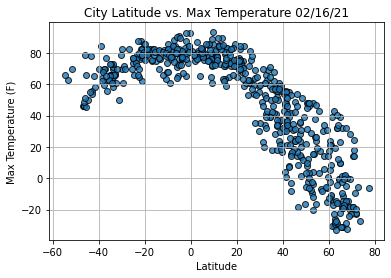

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

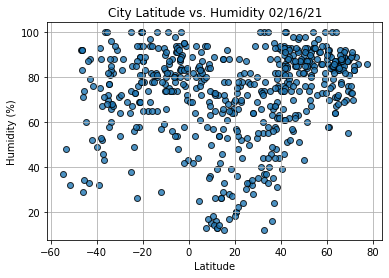

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

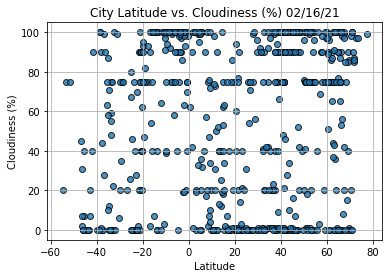

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

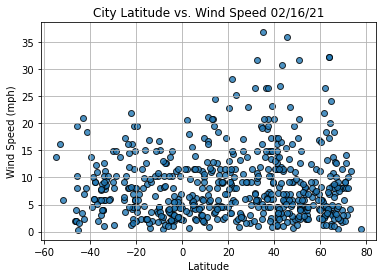

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [38]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [40]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-02-16 19:54:53,38.5167,-28.7000,55.40,88,75,14.97
2,Tuktoyaktuk,CA,2021-02-16 19:54:53,69.4541,-133.0374,-20.20,76,90,8.05
4,Cabo San Lucas,MX,2021-02-16 19:51:40,22.8909,-109.9124,75.00,52,1,11.50
6,Upernavik,GL,2021-02-16 19:54:54,72.7868,-56.1549,-5.84,89,97,4.09
8,Severo-Kurilsk,RU,2021-02-16 19:54:54,50.6789,156.1250,31.41,98,100,31.65


In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

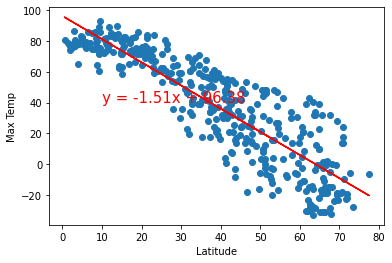

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

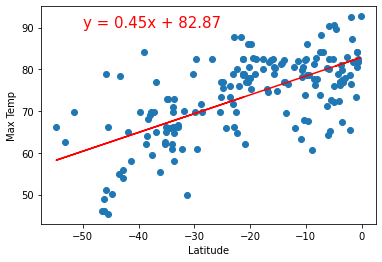

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

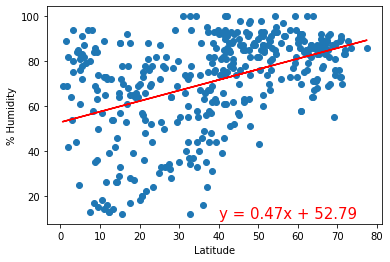

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

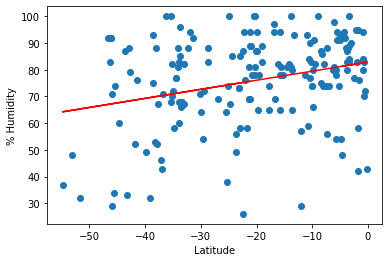

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

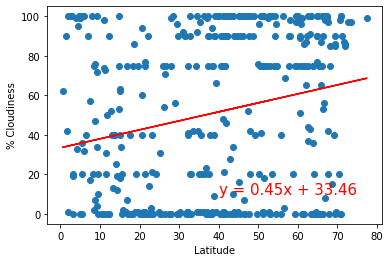

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

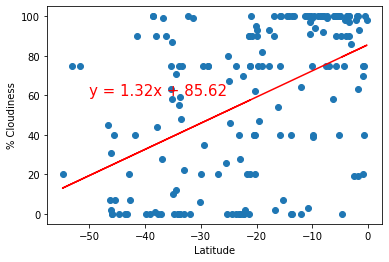

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

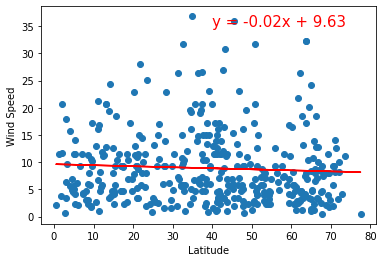

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

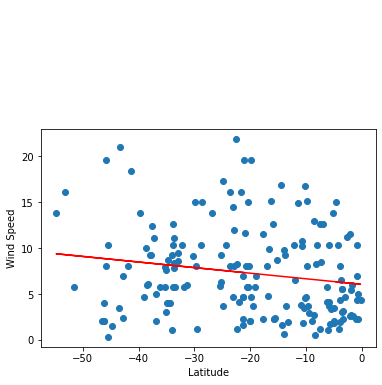

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))